

<img src="https://raw.githubusercontent.com/GT-PGSL/FrozenLegacies/main/Demo/logo-combine.png" alt="Frozen Legacies Logo" width="220" align="right"/>

# 🧊 Frozen Legacies: Antarctic Ice Radar Demo




---

Welcome, explorers!  
This interactive notebook lets you analyze real radar data from Antarctica to measure ice thickness—just like polar scientists do.


**What you'll do:**
- 🛰️ Load and visualize a radargram (a kind of "ice X-ray")
- 🎯 Calibrate the radar using a timing mark (pip)
- 📈 Detect the ice surface and bedrock echoes
- 🧮 Calculate ice thickness and see it on the image
- 💾 Save and share your results

<img src="https://raw.githubusercontent.com/GT-PGSL/FrozenLegacies/main/Demo/radar-cartoon-1.png" alt="Radar Sounding Cartoon" width="820" align="center"/>

# SECTION 1: SETUP ENVIRONMENT

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required packages
!pip install numpy matplotlib scikit-image tifffile opencv-python ipywidgets ipympl --quiet

%matplotlib inline
from ipywidgets import interact
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
import os
import sys
import matplotlib.pyplot as plt
import warnings

# Configure environment
plt.rcParams["font.sans-serif"] = ["DejaVu Sans"]
plt.rcParams["font.family"] = "sans-serif"
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")



Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00


# SECTION 2: LOAD OUR Z-SCOPE PROCESSOR CODE

In [3]:
# Clone the repository with our processing code
!git clone https://github.com/GT-PGSL/FrozenLegacies.git

# Add our code to Python's search path
sys.path.append(str(Path.cwd() / "FrozenLegacies/Z_Scope_Processing"))

# Import our custom radar processing tools
from zscope_processor import ZScopeProcessor
from functions.image_utils import load_and_preprocess_image

Cloning into 'FrozenLegacies'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 73 (delta 4), reused 69 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (73/73), 186.11 KiB | 925.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


# SECTION 3: LOAD RADAR DATA

## 1. Load and View the Radargram

> **What is a radargram?**  
> It's a special image made by bouncing radar waves off the ice and bedrock.  
> The top bright line is the ice surface, the bottom is the bedrock.  
> The distance between them tells us how thick the ice is!

Let's load the radargram and see what it looks like.

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (91173600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Successfully loaded image: demo.tiff
Original image dtype: uint16, shape: (2400, 37989)
Converting image from uint16 to uint8 using percentiles (2%, 98%)...
Converted image dtype: uint8
Loaded radargram: 37989 columns × 2400 depth points


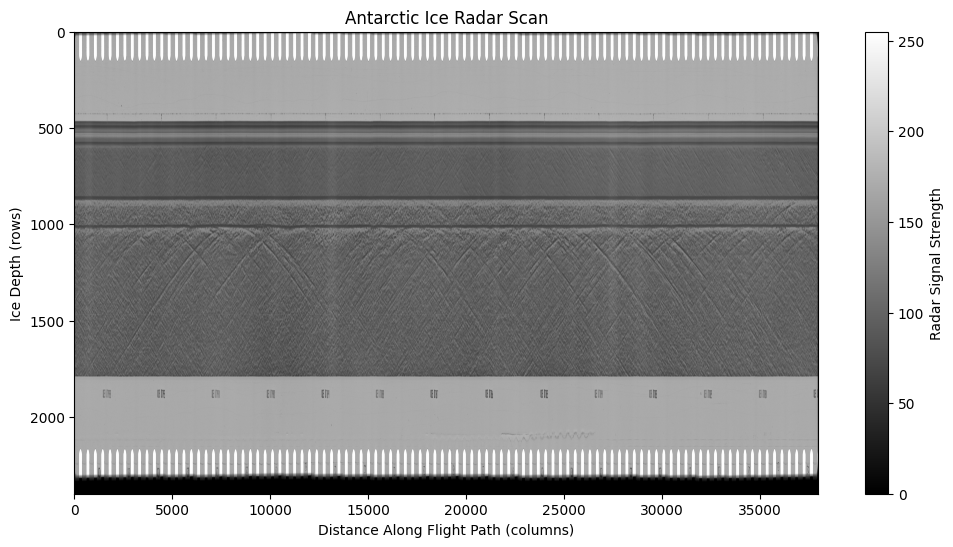

In [4]:
# Load our example radar image (118MB Antarctic ice scan)
image_path = "./FrozenLegacies/Demo/demo.tiff"
radar_image = load_and_preprocess_image(image_path, {})

# Check if image loaded correctly
if radar_image is None:
    print("Error: Could not load radar image. Please check file path.")
else:
    print(f"Loaded radargram: {radar_image.shape[1]} columns × {radar_image.shape[0]} depth points")

# Visualize the raw radar data
plt.figure(figsize=(12, 6))
plt.imshow(radar_image, cmap='gray', aspect='auto')
plt.title("Antarctic Ice Radar Scan")
plt.xlabel("Distance Along Flight Path (columns)")
plt.ylabel("Ice Depth (rows)")
plt.colorbar(label="Radar Signal Strength")
plt.show()


## 🧊 Educational Note: What Are You Seeing?

> **This is a radargram, a special kind of "ice X-ray" scientists use to study Antarctica!**

- **Cyan line**: Traces the ice surface detected by the radar.
- **Green line**: Follows the bedrock underneath the ice.
- **Labels**: Show the average depth for each layer.
- **Ice thickness**: The distance between the surface and bedrock lines.

**Try this:**
- Change the calibration point and rerun the analysis to see how the results change!
- Zoom in on different parts of the radargram to explore ice features.

---

### Why does this matter?
- Measuring ice thickness helps scientists predict sea-level rise.
- Radargrams reveal hidden layers and features inside the ice.
- This is real data from Antarctica—you're doing real science!

---

# SECTION 4: CALIBRATION


In [5]:
# Interactive calibration tool
from ipywidgets import interact

@interact(pip_location=(0, radar_image.shape[1], 100))
def select_calibration_point(pip_location):
    """
    HOW CALIBRATION WORKS:
    Radar instruments send timed pulses. We need to find the calibration pip
    (small timing marks) to convert pixels to real-world units.

    INSTRUCTIONS:
    1. Move the slider until the red line aligns with the vertical calibration marks
    2. Look for small, evenly spaced horizontal ticks on the right side
    """
    plt.figure(figsize=(12, 6))
    plt.imshow(radar_image, cmap='gray')
    plt.axvline(pip_location, color='red', linestyle='--', linewidth=2)
    plt.title(f"Calibration Point Selection: X = {pip_location}")
    plt.show()
    return pip_location


interactive(children=(IntSlider(value=18900, description='pip_location', max=37989, step=100), Output()), _dom…

## 2. Calibrate the Radargram

> **Why calibrate?**  
> Calibration helps us turn pixel distances into real-world distances (meters).  
> Move the slider to select the calibration mark (pip), then run the next cell.

---

In [ ]:
# After selecting with slider:
calibration_x = 1800  # <<< REPLACE WITH YOUR SELECTED VALUE

# SECTION 5: ICE THICKNESS ANALYSIS

## 3. Analyze and Visualize Ice Thickness

> **What do the lines mean?**
> - **Dark green line:** Detected ice surface
> - **Dark pink line:** Detected bedrock
> - **Labels:** Show the depth of each, and the ice thickness in meters

Try changing the calibration and rerun to see what happens!

INFO: Successfully loaded processing configuration from /content/FrozenLegacies/Z_Scope_Processing/config/default_config.json
INFO: Successfully loaded physical constants from /content/FrozenLegacies/Z_Scope_Processing/config/physical_constants.json

--- Processing Z-scope Image: demo ---

Step 1: Loading and preprocessing image...
Successfully loaded image: demo.tiff
Original image dtype: uint16, shape: (2400, 37989)
Converting image from uint16 to uint8 using percentiles (2%, 98%)...
Converted image dtype: uint8
INFO: Image dimensions: 37989x2400

Step 2: Detecting film artifact boundaries...
INFO: Film artifact boundaries determined: Top=482, Bottom=2097

Step 3: Detecting transmitter pulse...
INFO: Transmitter pulse detected at Y-pixel (absolute): 534

Step 4: Detecting calibration pip around X-pixel 1800...
INFO: Z-scope boundary for pip strip detected at Y-pixel (absolute): 1294
Detecting calibration pip focused around x=1800, with Z-boundary at y=1294
Approach 1: Processing user


--- Processing for demo complete. ---
INFO: Main calibrated plot saved to results/demo_time_calibrated_zscope.png


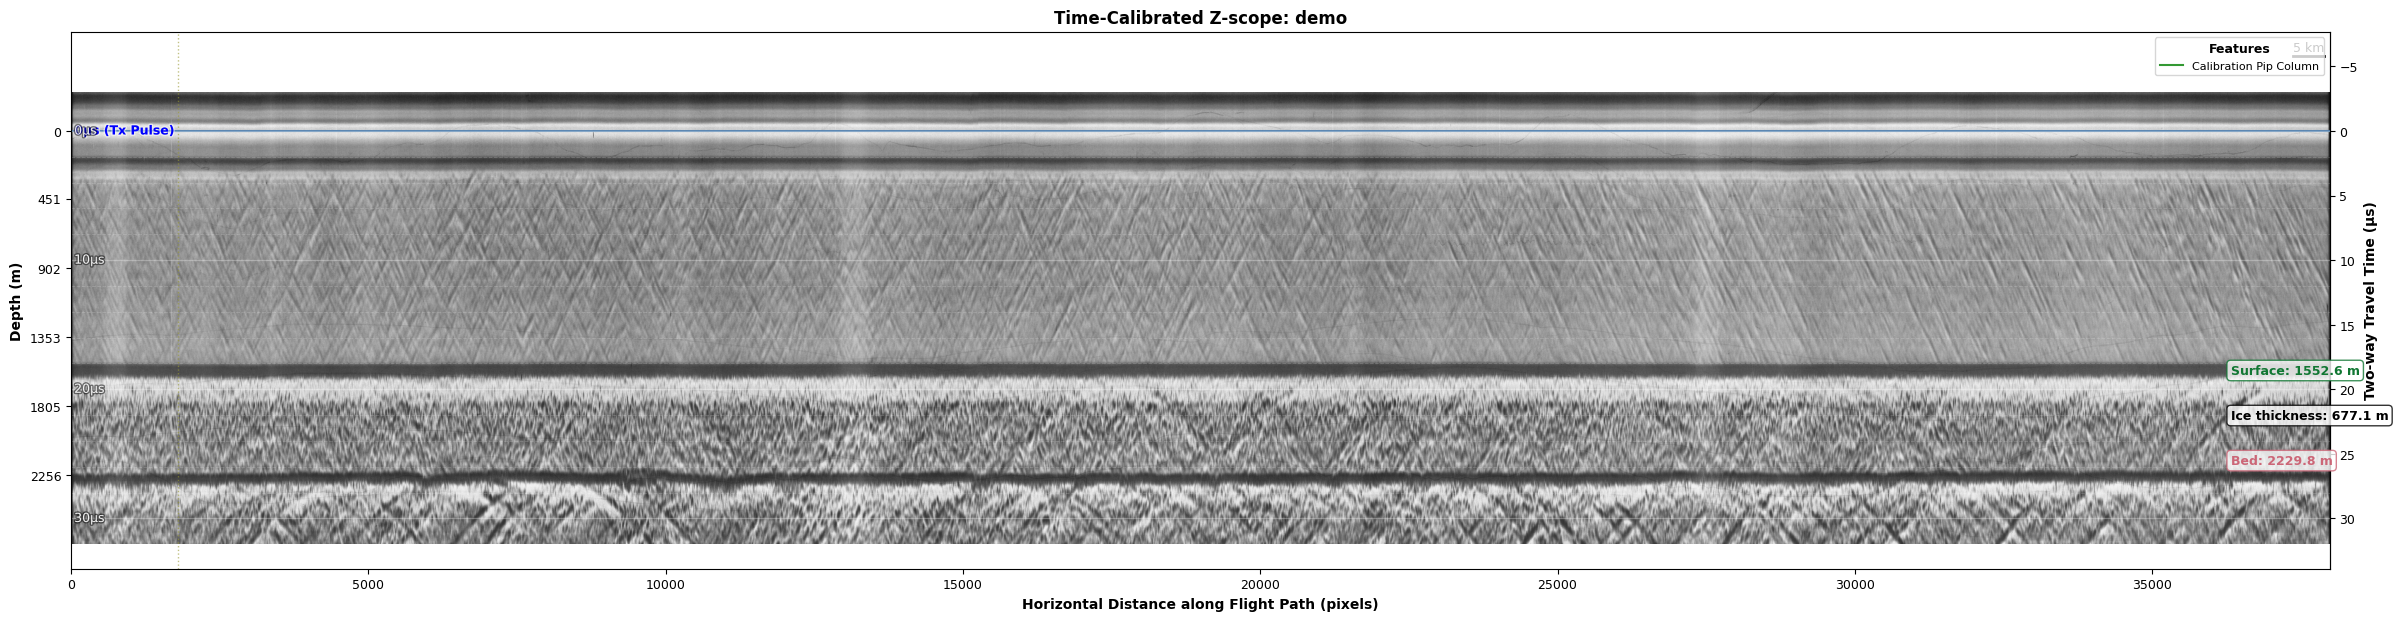

In [6]:
# Initialize processing engine
processor = ZScopeProcessor(
    config_path="config/default_config.json",
    physics_path="config/physical_constants.json"
)

# Create output directory
output_dir = "results"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Run full processing pipeline
processing_successful = processor.process_image(
    image_path,
    output_dir,
    calibration_x  # Uses your selected calibration point
)


# SECTION 6: RESULTS VISUALIZATION

In [8]:
if processing_successful:
    print("\nSUCCESS: Processing complete! Results:")
    # Display key findings
    print(f"- Ice surface detected at ~{np.nanmean(processor.detected_surface_y_abs):.0f} pixels depth")
    print(f"- Bedrock detected at ~{np.nanmean(processor.detected_bed_y_abs):.0f} pixels depth")
    mean_thickness_pixels = np.nanmean(processor.detected_bed_y_abs - processor.detected_surface_y_abs)
    print(f"- Estimated ice thickness: {mean_thickness_pixels:.0f} pixels")

    # --- Plotting: Ensure lines and labels are correct in both inline and saved plots ---
    ax = processor.calibrated_ax
    fig = processor.calibrated_fig

    # Plot surface echo line and label
    if processor.detected_surface_y_abs is not None and np.any(np.isfinite(processor.detected_surface_y_abs)):
        surface_y = processor.detected_surface_y_abs - processor.data_top_abs
        valid = np.isfinite(surface_y)
        ax.plot(
            np.arange(len(surface_y))[valid],
            surface_y[valid],
            color="#117733",
            linestyle="-",
            linewidth=1.5,
            label="Surface Echo",
            zorder=10
        )

    # Plot bed echo line and label
    if processor.detected_bed_y_abs is not None and np.any(np.isfinite(processor.detected_bed_y_abs)):
        bed_y = processor.detected_bed_y_abs - processor.data_top_abs
        valid = np.isfinite(bed_y)
        ax.plot(
            np.arange(len(bed_y))[valid],
            bed_y[valid],
            color="#CC6677",
            linestyle="-",
            linewidth=1.5,
            label="Bed Echo",
            zorder=10
        )

    # Add legend (labels will match line colors)
    ax.legend(loc="upper right", fontsize="small")

    # Show the figure inline
    fig.tight_layout()
    fig.show()

    # Save the output with all overlays
    output_path = Path(output_dir) / "processed_radargram.png"
    fig.savefig(output_path, dpi=200, bbox_inches="tight")
    print(f"\nRESULTS SAVED TO: {output_path}")

else:
    print("Processing failed. Check error messages above.")



SUCCESS: Processing complete! Results:
- Ice surface detected at ~857 pixels depth
- Bedrock detected at ~999 pixels depth
- Estimated ice thickness: 142 pixels



RESULTS SAVED TO: results/processed_radargram.png


'\nWhat do you see?\n- The cyan line traces the ice surface; the green line traces the bedrock.\n- The labels show the average depth for each.\n- Try changing the calibration_x value and rerun to see how it affects the results!\n'

# FINAL SECTION

CONGRATULATIONS! You've completed the Antarctic ice analysis.

## WHAT YOU ACCOMPLISHED:

- **You loaded and analyzed real Antarctic radar data!**
- **You measured the ice thickness using science and code.**
- **You visualized your results with labeled lines and colors.**

> **Why does this matter?**  
> Understanding ice thickness helps scientists predict sea-level rise and study Earth's climate history.

---

### Next Steps

- Try analyzing a different radargram from the Frozen Legacies project.
- Change the calibration and see how your results change.
- Ask your teacher how radar is used in other fields!

---
